In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# AA County COVID-19 Cases By Zip Code (2020-04-11)

In [2]:
aa_county_cases = {  
    "20701" : 0,
    "20711" : 7,
    "20714" : 2,
    "20724" : 29,
    "20733" : 3 ,
    "20736" : 0,
    "20751" : 5,
    "20754" : 0,
    "20755" : 0,
    "20758" : 0,
    "20764" : 5,
    "20765" : 0,
    "20776" : 1,
    "20778" : 0,
    "20779" : 0,
    "21012" : 17,
    "21032" : 6,
    "21035" : 3,
    "21037" : 18,
    "21054" : 18,
    "21060" : 33,
    "21061" : 47,
    "21062" : 0,
    "21076" : 30,
    "21077" : 1,
    "21090" : 7,
    "21108" : 15,
    "21113" : 24,
    "21114" : 20,
    "21122" : 55,
    "21140" : 1,
    "21144" : 29,
    "21146": 19,
    "21225": 11,
    "21226": 3,
    "21240": 0,
    "21401": 41,
    "21402": 2,
    "21403": 24,
    "21405": 2,
    "21409": 14,
    "21411": 0,
    "21412": 0
}

cases = pd.DataFrame(aa_county_cases.items(),columns=['ZIPCODE','Cases'])
cases.set_index('ZIPCODE')
print(cases)

   ZIPCODE  Cases
0    20701      0
1    20711      7
2    20714      2
3    20724     29
4    20733      3
5    20736      0
6    20751      5
7    20754      0
8    20755      0
9    20758      0
10   20764      5
11   20765      0
12   20776      1
13   20778      0
14   20779      0
15   21012     17
16   21032      6
17   21035      3
18   21037     18
19   21054     18
20   21060     33
21   21061     47
22   21062      0
23   21076     30
24   21077      1
25   21090      7
26   21108     15
27   21113     24
28   21114     20
29   21122     55
30   21140      1
31   21144     29
32   21146     19
33   21225     11
34   21226      3
35   21240      0
36   21401     41
37   21402      2
38   21403     24
39   21405      2
40   21409     14
41   21411      0
42   21412      0


Loading 2010 census data by zip code.  Data is broken down by age range and gender.  Summary rows have no gender.

population,minimum_age,maximum_age,gender,zipcode,geo_id

In [3]:
pop = pd.read_csv('population_by_zip_2010.csv',dtype={'zipcode': str})
pop['ZIPCODE'] = pop['zipcode']
pop.set_index('ZIPCODE')
pop = pop[(pop['gender'] != 'male') & (pop['gender'] != 'female')]

Merge case data for Anne Arundel county with population

In [4]:
pop = pop.merge(cases,on='ZIPCODE').sort_values('ZIPCODE')
pop

,population,minimum_age,maximum_age,gender,zipcode,geo_id,ZIPCODE,Cases
35,2,NaN,NaN,NaN,20701,8600000US20701,20701,0
19,6643,NaN,NaN,NaN,20711,8600000US20711,20711,7
20,4345,NaN,NaN,NaN,20714,8600000US20714,20714,2
27,16093,NaN,NaN,NaN,20724,8600000US20724,20724,29
15,2672,NaN,NaN,NaN,20733,8600000US20733,20733,3
9,8904,NaN,NaN,NaN,20736,8600000US20736,20736,0
17,2343,NaN,NaN,NaN,20751,8600000US20751,20751,5
37,6951,NaN,NaN,NaN,20754,8600000US20754,20754,0
6,9302,NaN,NaN,NaN,20755,8600000US20755,20755,0
39,721,NaN,NaN,NaN,20758,8600000US20758,20758,0


Read zip codes geo file and merge with population data

In [5]:
zips = gpd.read_file('cb_2018_us_zcta510_500k.shp')
zips['ZIPCODE'] = zips['ZCTA5CE10']
zips.set_index('ZIPCODE')
zips = zips.merge(pop,on='ZIPCODE',how='inner')

# Cases per 1,000

In [9]:
zips['density'] = zips['Cases'] / (zips['population'] / 1_000)
zips['density'] = zips['density'].replace(np.nan,0)
zips.set_index('ZIPCODE')
print(zips[['ZIPCODE','density','Cases','population']].sort_values('density'))

   ZIPCODE   density  Cases  population
0    20779  0.000000      0        1182
24   20758  0.000000      0         721
23   20755  0.000000      0        9302
13   20736  0.000000      0        8904
7    20778  0.000000      0        2009
6    20765  0.000000      0         514
19   20754  0.000000      0        6951
4    20701  0.000000      0           2
1    21240  0.000000      0           0
8    21140  0.289268      1        3457
12   20776  0.304044      1        3289
15   21225  0.327918     11       33545
31   21402  0.383362      2        5217
34   21035  0.383877      3        7815
32   21226  0.396773      3        7561
18   20714  0.460299      2        4345
33   21032  0.678119      6        8848
11   21409  0.697767     14       20064
27   21146  0.711477     19       26705
3    21090  0.715454      7        9784
36   21113  0.787686     24       30469
35   21114  0.792864     20       25225
9    21403  0.792890     24       30269
29   21012  0.797486     17       21317


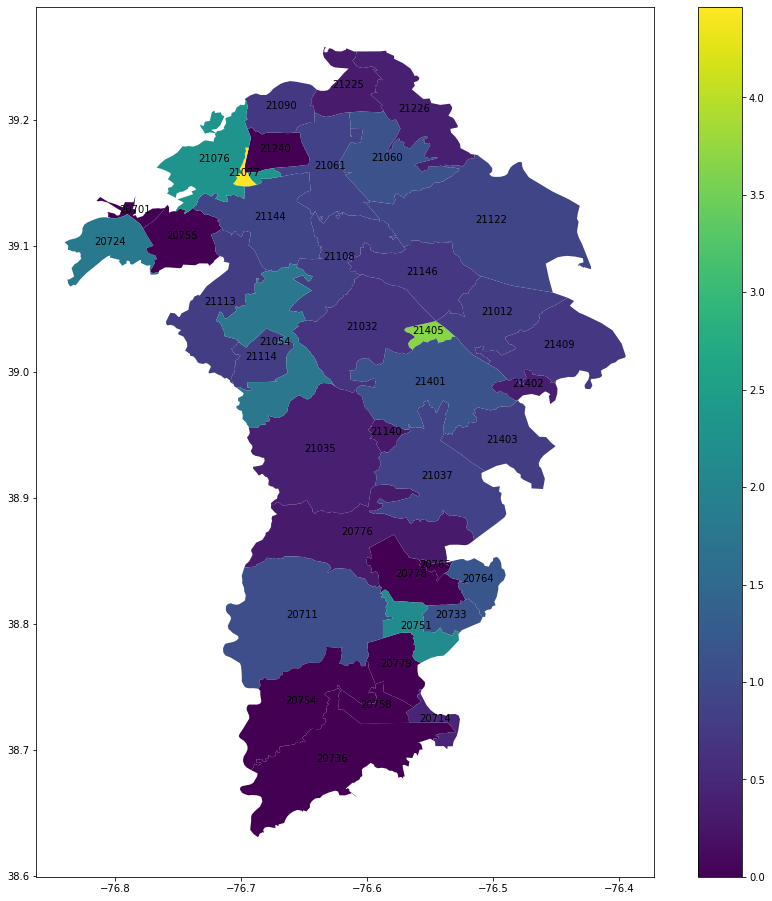

In [10]:
zplot = zips.plot(column='density',figsize=(16,16),legend=True)
_ = zips.apply(lambda x: zplot.annotate(s=x.ZCTA5CE10, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)